<a href="https://colab.research.google.com/github/Saptiva-sudo/CODSOFT/blob/main/Codsoft_Task_2_Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

Downloading dataset

In [ ]:
!kaggle datasets download -d kartik2112/fraud-detection

fraud-detection.zip: Skipping, found more recently modified local copy (use --force to force download)


Extracting zip file

In [ ]:
import zipfile
zip_ref = zipfile.ZipFile('/content/fraud-detection.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

Importing Modules

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

Remove warnings

In [ ]:
import warnings
warnings.filterwarnings('ignore')

Loading datasets

In [ ]:
train_df = pd.read_csv("/content/fraudTrain.csv", index_col='Unnamed: 0')
train_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
test_df = pd.read_csv("/content/fraudTest.csv", index_col='Unnamed: 0')
test_df.head()

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 22 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  lat                    1296675 non-null  float64
 13  long                   1296675 non-null  float64
 14  city_pop          

In [ ]:
train_df.describe()

,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06,1.296675e+06
mean,4.171920e+17,7.035104e+01,4.880067e+04,3.853762e+01,-9.022634e+01,8.882444e+04,1.349244e+09,3.853734e+01,-9.022646e+01,5.788652e-03
std,1.308806e+18,1.603160e+02,2.689322e+04,5.075808e+00,1.375908e+01,3.019564e+05,1.284128e+07,5.109788e+00,1.377109e+01,7.586269e-02
min,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902779e+01,-1.666712e+02,0.000000e+00
25%,1.800429e+14,9.650000e+00,2.623700e+04,3.462050e+01,-9.679800e+01,7.430000e+02,1.338751e+09,3.473357e+01,-9.689728e+01,0.000000e+00
50%,3.521417e+15,4.752000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.456000e+03,1.349250e+09,3.936568e+01,-8.743839e+01,0.000000e+00
75%,4.642255e+15,8.314000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.359385e+09,4.195716e+01,-8.023680e+01,0.000000e+00
max,4.992346e+18,2.894890e+04,9.978300e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.371817e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  555719 non-null  object 
 1   cc_num                 555719 non-null  int64  
 2   merchant               555719 non-null  object 
 3   category               555719 non-null  object 
 4   amt                    555719 non-null  float64
 5   first                  555719 non-null  object 
 6   last                   555719 non-null  object 
 7   gender                 555719 non-null  object 
 8   street                 555719 non-null  object 
 9   city                   555719 non-null  object 
 10  state                  555719 non-null  object 
 11  zip                    555719 non-null  int64  
 12  lat                    555719 non-null  float64
 13  long                   555719 non-null  float64
 14  city_pop               555719 non-nu

In [ ]:
train_df["is_fraud"].value_counts()

0    1289169
1       7506
Name: is_fraud, dtype: int64

In [ ]:
train_df[['gender','is_fraud']].groupby(by=['is_fraud',"gender"]).size()

is_fraud  gender
0         F         706128
          M         583041
1         F           3735
          M           3771
dtype: int64

Visualisation



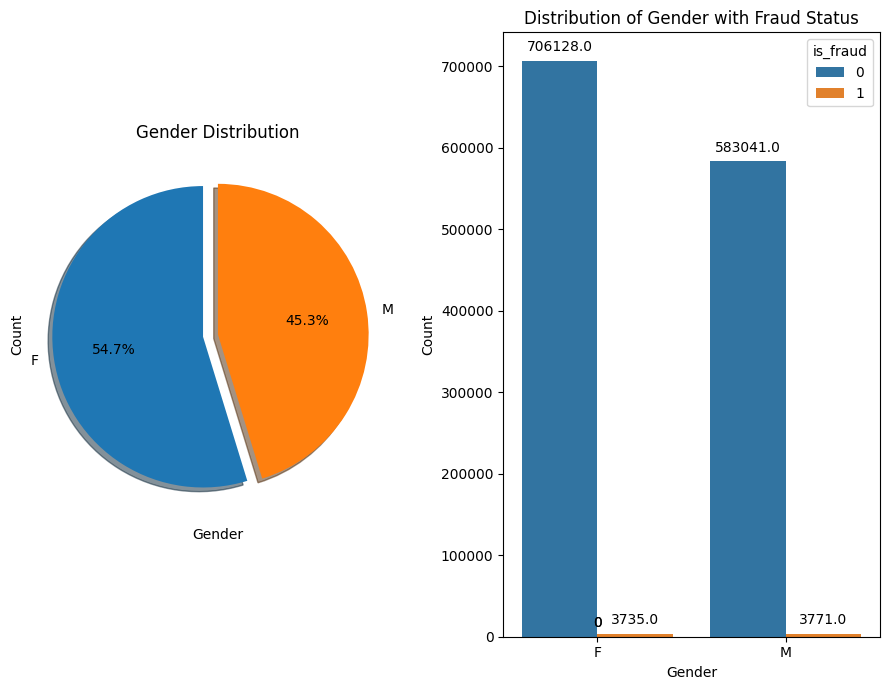

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(9,7))
train_df['gender'].value_counts().plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, explode=(0.1, 0), shadow=True)
axes[0].set_title('Gender Distribution')

sns.countplot(x='gender', hue='is_fraud', data=train_df, ax=axes[1])
axes[1].set_title('Distribution of Gender with Fraud Status')

for p in axes[1].patches:
    axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                     ha='center', va='center', xytext=(0, 10), textcoords='offset points')

for ax in axes:
    ax.set_xlabel('Gender')
    ax.set_ylabel('Count')
plt.tight_layout()
plt.show()

Coverying to datetime formats

In [ ]:
train_df["trans_date_trans_time"] = pd.to_datetime(train_df["trans_date_trans_time"])
train_df["dob"] = pd.to_datetime(train_df["dob"])
train_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,Boulder,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,Doe Hill,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,2020-06-21 12:12:08,30263540414123,fraud_Reichel Inc,entertainment,15.56,Erik,Patterson,M,162 Jessica Row Apt. 072,Hatch,...,37.7175,-112.4777,258,Geoscientist,1961-11-24,440b587732da4dc1a6395aba5fb41669,1371816728,36.841266,-111.690765,0
1296671,2020-06-21 12:12:19,6011149206456997,fraud_Abernathy and Sons,food_dining,51.70,Jeffrey,White,M,8617 Holmes Terrace Suite 651,Tuscarora,...,39.2667,-77.5101,100,"Production assistant, television",1979-12-11,278000d2e0d2277d1de2f890067dcc0a,1371816739,38.906881,-78.246528,0
1296672,2020-06-21 12:12:32,3514865930894695,fraud_Stiedemann Ltd,food_dining,105.93,Christopher,Castaneda,M,1632 Cohen Drive Suite 639,High Rolls Mountain Park,...,32.9396,-105.8189,899,Naval architect,1967-08-30,483f52fe67fabef353d552c1e662974c,1371816752,33.619513,-105.130529,0
1296673,2020-06-21 12:13:36,2720012583106919,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,Joseph,Murray,M,42933 Ryan Underpass,Manderson,...,43.3526,-102.5411,1126,Volunteer coordinator,1980-08-18,d667cdcbadaaed3da3f4020e83591c83,1371816816,42.788940,-103.241160,0


In [ ]:
test_df["trans_date_trans_time"] = pd.to_datetime(test_df["trans_date_trans_time"])
test_df["dob"] = pd.to_datetime(test_df["dob"])
test_df

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,Columbia,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,Altonah,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,Bellmore,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,Titusville,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,Falmouth,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,Luray,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,Lake Jackson,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,Burbank,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,Mesa,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


Dropping the unwanted columns

In [ ]:
train_df.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
train_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [ ]:
test_df.drop(columns=['cc_num','first', 'last', 'street', 'city', 'state', 'zip', 'dob', 'trans_num','trans_date_trans_time'],inplace=True)
test_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


In [ ]:
train_df.dropna(inplace=True)
train_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,"fraud_Rippin, Kub and Mann",misc_net,4.97,F,36.0788,-81.1781,3495,"Psychologist, counselling",1325376018,36.011293,-82.048315,0
1,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,F,48.8878,-118.2105,149,Special educational needs teacher,1325376044,49.159047,-118.186462,0
2,fraud_Lind-Buckridge,entertainment,220.11,M,42.1808,-112.2620,4154,Nature conservation officer,1325376051,43.150704,-112.154481,0
3,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,M,46.2306,-112.1138,1939,Patent attorney,1325376076,47.034331,-112.561071,0
4,fraud_Keeling-Crist,misc_pos,41.96,M,38.4207,-79.4629,99,Dance movement psychotherapist,1325376186,38.674999,-78.632459,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1296670,fraud_Reichel Inc,entertainment,15.56,M,37.7175,-112.4777,258,Geoscientist,1371816728,36.841266,-111.690765,0
1296671,fraud_Abernathy and Sons,food_dining,51.70,M,39.2667,-77.5101,100,"Production assistant, television",1371816739,38.906881,-78.246528,0
1296672,fraud_Stiedemann Ltd,food_dining,105.93,M,32.9396,-105.8189,899,Naval architect,1371816752,33.619513,-105.130529,0
1296673,"fraud_Reinger, Weissnat and Strosin",food_dining,74.90,M,43.3526,-102.5411,1126,Volunteer coordinator,1371816816,42.788940,-103.241160,0


In [ ]:
test_df.dropna(inplace=True)
test_df

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,Mechanical engineer,1371816865,33.986391,-81.200714,0
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,"Sales professional, IT",1371816873,39.450498,-109.960431,0
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,"Librarian, public",1371816893,40.495810,-74.196111,0
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,Set designer,1371816915,28.812398,-80.883061,0
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,Furniture designer,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...
555714,fraud_Reilly and Sons,health_fitness,43.77,M,40.4931,-91.8912,519,Town planner,1388534347,39.946837,-91.333331,0
555715,fraud_Hoppe-Parisian,kids_pets,111.84,M,29.0393,-95.4401,28739,Futures trader,1388534349,29.661049,-96.186633,0
555716,fraud_Rau-Robel,kids_pets,86.88,F,46.1966,-118.9017,3684,Musician,1388534355,46.658340,-119.715054,0
555717,fraud_Breitenberg LLC,travel,7.99,M,44.6255,-116.4493,129,Cartographer,1388534364,44.470525,-117.080888,0


Preprocessing Features

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
train_df["merchant"] = encoder.fit_transform(train_df["merchant"])
train_df["category"] = encoder.fit_transform(train_df["category"])
train_df["gender"] = encoder.fit_transform(train_df["gender"])
train_df["job"] = encoder.fit_transform(train_df["job"])
train_df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,514,8,4.97,0,36.0788,-81.1781,3495,370,1325376018,36.011293,-82.048315,0
1,241,4,107.23,0,48.8878,-118.2105,149,428,1325376044,49.159047,-118.186462,0
2,390,0,220.11,1,42.1808,-112.2620,4154,307,1325376051,43.150704,-112.154481,0
3,360,2,45.00,1,46.2306,-112.1138,1939,328,1325376076,47.034331,-112.561071,0
4,297,9,41.96,1,38.4207,-79.4629,99,116,1325376186,38.674999,-78.632459,0


In [ ]:
test_df["merchant"] = encoder.fit_transform(test_df["merchant"])
test_df["category"] = encoder.fit_transform(test_df["category"])
test_df["gender"] = encoder.fit_transform(test_df["gender"])
test_df["job"] = encoder.fit_transform(test_df["job"])
test_df.head()

,merchant,category,amt,gender,lat,long,city_pop,job,unix_time,merch_lat,merch_long,is_fraud
0,319,10,2.86,1,33.9659,-80.9355,333497,275,1371816865,33.986391,-81.200714,0
1,591,10,29.84,0,40.3207,-110.4360,302,392,1371816873,39.450498,-109.960431,0
2,611,5,41.28,0,40.6729,-73.5365,34496,259,1371816893,40.495810,-74.196111,0
3,222,9,60.05,1,28.5697,-80.8191,54767,407,1371816915,28.812398,-80.883061,0
4,292,13,3.19,1,44.2529,-85.0170,1126,196,1371816917,44.959148,-85.884734,0


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1296675 entries, 0 to 1296674
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1296675 non-null  int64  
 1   category    1296675 non-null  int64  
 2   amt         1296675 non-null  float64
 3   gender      1296675 non-null  int64  
 4   lat         1296675 non-null  float64
 5   long        1296675 non-null  float64
 6   city_pop    1296675 non-null  int64  
 7   job         1296675 non-null  int64  
 8   unix_time   1296675 non-null  int64  
 9   merch_lat   1296675 non-null  float64
 10  merch_long  1296675 non-null  float64
 11  is_fraud    1296675 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 128.6 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555719 entries, 0 to 555718
Data columns (total 12 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   job         555719 non-null  int64  
 8   unix_time   555719 non-null  int64  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
dtypes: float64(5), int64(7)
memory usage: 55.1 MB


Normalization of features

In [ ]:
from sklearn.preprocessing import StandardScaler

x = train_df.drop("is_fraud", axis=1)
y = train_df["is_fraud"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=65)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

x_train.shape,y_train.shape,x_test.shape,y_test.shape

((1037340, 11), (1037340,), (259335, 11), (259335,))

Training model with Logistic Regression

In [ ]:
LR_model = LogisticRegression()
LR_model.fit(x_train, y_train)
predict_LR = LR_model.predict(x_test)
print(classification_report(y_test, predict_LR))
LR_accuracy = accuracy_score(predict_LR,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LR_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

Logistic Regression accuracy is: 99.36%


Training with Decision Tree Classifier Model

In [ ]:
DT = DecisionTreeClassifier(max_depth=(2), random_state=0)
DT.fit(x_train, y_train)
predict_ID3 = DT.predict(x_test)
print(classification_report(y_test, predict_ID3))
ID3_accuracy = accuracy_score(predict_ID3,y_test)
print('ID3 model accuracy is: {:.2f}%'.format(ID3_accuracy*100))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00    257834
           1       0.00      0.00      0.00      1501

    accuracy                           0.99    259335
   macro avg       0.50      0.50      0.50    259335
weighted avg       0.99      0.99      0.99    259335

ID3 model accuracy is: 99.42%


Training with Random Classfier Model

In [ ]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(x_train, y_train)

predict_RF = RF.predict(x_test)

# Evaluate the model
print(classification_report(y_test, predict_RF))
RF_accuracy = accuracy_score(predict_RF, y_test)
print('Random Forest model accuracy is: {:.2f}%'.format(RF_accuracy * 100))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.87      0.66      0.75      1501

    accuracy                           1.00    259335
   macro avg       0.94      0.83      0.87    259335
weighted avg       1.00      1.00      1.00    259335

Random Forest model accuracy is: 99.75%
